In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Eğitim seti boyutu",x_train.shape,y_train.shape)
print("Test seti boyutu",x_test.shape,y_test.shape)
num_labels = len(np.unique(y_train))

Eğitim seti boyutu (60000, 28, 28) (60000,)
Test seti boyutu (10000, 28, 28) (10000,)


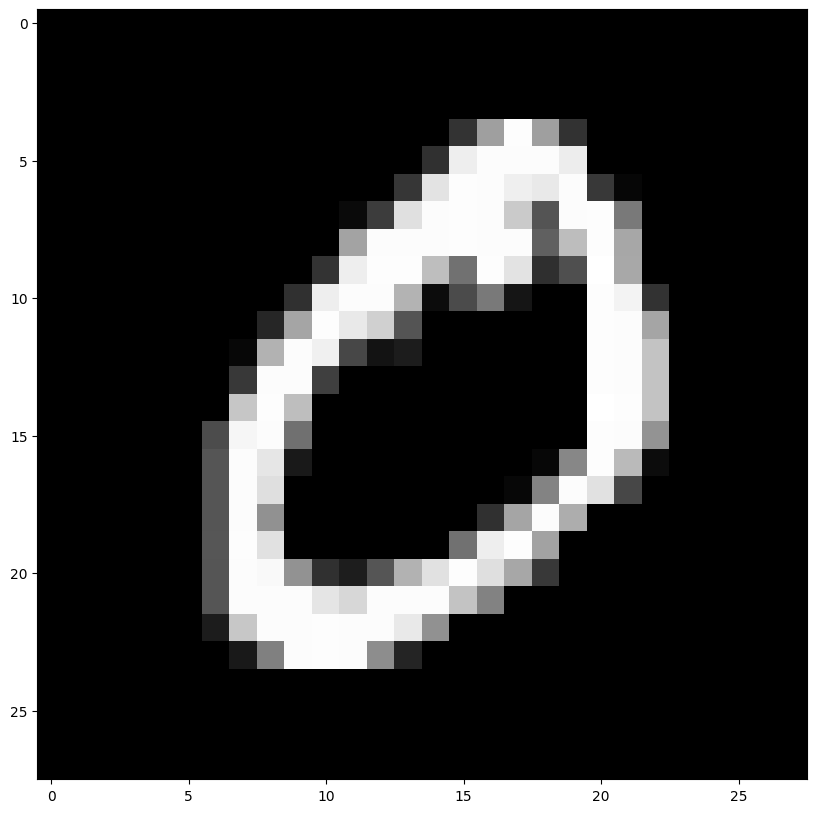

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap='gray');

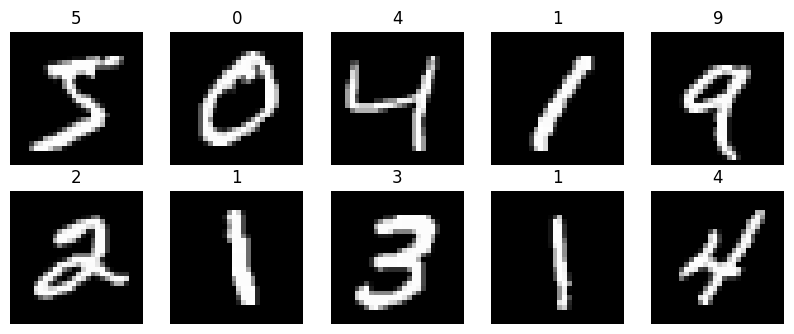

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')


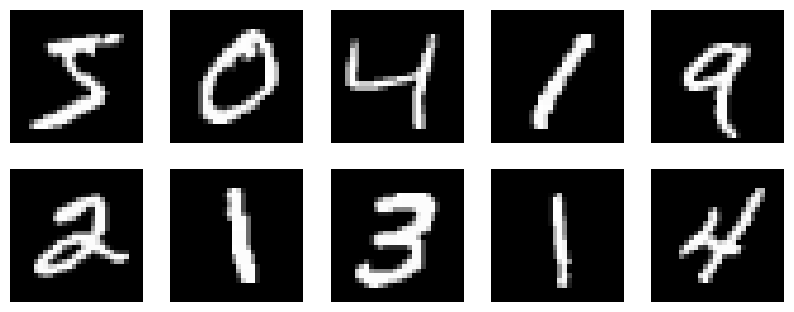

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for i in range(10):
   ax = plt.subplot(5,5,i+1)
   plt.imshow(data[i],cmap='gray')
   plt.axis('off')

visualize_img(x_train)

In [ ]:
x_train[2].mean()

24.799744897959183

In [ ]:
#encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
#reshaping
img_size = x_train.shape[1]
img_size
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

28

In [ ]:
#normalizasyon
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#modelleme
model = Sequential([Flatten(input_shape =(28,28,1)),
                    Dense(units =128,activation='relu',name='layer1'),
                    Dense(units = num_labels,activation = 'softmax',name='output_layer')])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9830 - loss: 0.0619 - precision: 0.9864 - recall: 0.9803 - val_accuracy: 0.9745 - val_loss: 0.0830 - val_precision: 0.9787 - val_recall: 0.9721
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9853 - loss: 0.0532 - precision: 0.9877 - recall: 0.9827 - val_accuracy: 0.9754 - val_loss: 0.0770 - val_precision: 0.9790 - val_recall: 0.9735
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9875 - loss: 0.0439 - precision: 0.9894 - recall: 0.9857 - val_accuracy: 0.9769 - val_loss: 0.0746 - val_precision: 0.9791 - val_recall: 0.9747
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9894 - loss: 0.0377 - precision: 0.9909 - recall: 0.9878 - val_accuracy: 0.9785 - val_loss: 0.0714 - val_precision: 0.9811 - val_recall: 0.9769
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9912 - loss: 0.0332 - precision: 0.9924 - recall: 0.9900 - val_accuracy: 0.9775 - val_loss: 0.

In [ ]:
#model başarı değerlendirme
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9979 - loss: 0.0111 - precision: 0.9982 - recall: 0.9975 - val_accuracy: 0.9793 - val_loss: 0.0681 - val_precision: 0.9814 - val_recall: 0.9783
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9981 - loss: 0.0100 - precision: 0.9985 - recall: 0.9978 - val_accuracy: 0.9800 - val_loss: 0.0703 - val_precision: 0.9814 - val_recall: 0.9793
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9987 - loss: 0.0084 - precision: 0.9988 - recall: 0.9985 - val_accuracy: 0.9784 - val_loss: 0.0781 - val_precision: 0.9801 - val_recall: 0.9776
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9991 - loss: 0.0075 - precision: 0.9992 - recall: 0.9990 - val_accuracy: 0.9774 - val_loss: 0.0798 - val_precision: 0.9786 - val_recall: 0.9764
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9986 - loss: 0.0077 - precision: 0.9986 - recall: 0.9985 - val_accuracy: 0.9777 - val_loss: 0.

In [ ]:
#model kaydedilmesi ve Tahminiçin kullanılması
model.save('mnist_model.h5')

In [ ]:
import random
random =random.randint(0,x_test.shape[0])
random

7686

In [ ]:
test_image = x_test[random]
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

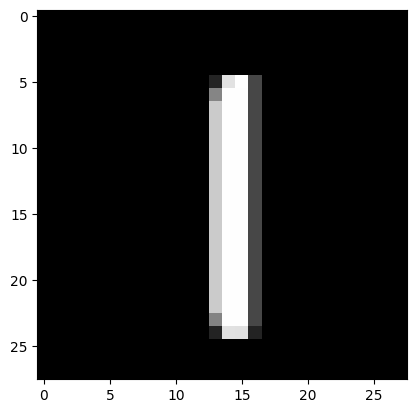

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)
prob = model.predict(test_data)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[5.9185634e-14, 9.9999809e-01, 6.8035133e-10, 4.2186667e-09,
        1.3570255e-09, 8.1838571e-11, 1.6310597e-10, 1.2923613e-07,
        1.7988191e-06, 2.1029811e-09]], dtype=float32)

In [ ]:
predict_class = np.argmax(prob)
predict_class

1

In [ ]:
print("Tahmin edilen değer",predict_class)
print("Gerçek değer",np.argmax(y_test[random]))

Tahmin edilen değer 1
Gerçek değer 1


In [ ]:
print(f"Tahmin edilen sınıfın olasılık değeri : {(np.max(prob,axis=-1))[0]}\n")
print(f"Diğer sınıfların olasılık değeri : \n{prob}")

Tahmin edilen sınıfın olasılık değeri : 0.9999980926513672

Diğer sınıfların olasılık değeri : 
[[5.9185634e-14 9.9999809e-01 6.8035133e-10 4.2186667e-09 1.3570255e-09
  8.1838571e-11 1.6310597e-10 1.2923613e-07 1.7988191e-06 2.1029811e-09]]
